In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('mkt_data.csv')

In [4]:
df

,id,send_date,estimated_age,age_range,channel,coupon,clicked,last_step,nb_units,order_value
0,1,2019-04-12,59,46-60,SMS,2,0,received,0,0
1,2,2019-04-08,27,18-30,Email,2,0,received,0,0
2,3,2019-04-05,74,60+,Email,2,0,received,0,0
3,4,2019-04-21,32,31-45,SMS,2,0,received,0,0
4,5,2019-04-28,42,31-45,Email,2,0,received,0,0
...,...,...,...,...,...,...,...,...,...,...
299995,299996,2019-04-26,23,18-30,Email,2,0,received,0,0
299996,299997,2019-04-30,52,46-60,SMS,4,0,received,0,0
299997,299998,2019-04-22,20,18-30,SMS,2,0,received,0,0
299998,299999,2019-04-04,53,46-60,SMS,2,0,received,0,0


In [5]:
org_value = []
for i in range(len(df)):
    if df.loc[i,'last_step'] == 'purchased':
        org_value.append(df.loc[i,'coupon'] + df.loc[i,'order_value'])
    else:
        org_value.append(df.loc[i,'order_value'])

df['org_value'] = org_value

## Theo channel

In [6]:
df_summ = df.groupby(['age_range']).agg({'clicked':'sum','coupon':'sum','order_value':'sum','org_value':'sum','send_date':'count'})
df_summ.columns = ['num_click', 'coupon_value', 'order_value', 'org_value','num_receive']
df_summ.reset_index(inplace=True)
df_summ

,age_range,num_click,coupon_value,order_value,org_value,num_receive
0,18-30,6205,315992,44128,46386,102107
1,31-45,7778,380998,45758,48020,122900
2,46-60,3265,157708,25466,26948,50893
3,60+,518,74636,512,540,24100


In [7]:
for step in df.last_step.unique():
    if step == 'received':
        continue
    print(step)
    tmp_2 = df[df['last_step']==step]
    tmp_2 = tmp_2.groupby(['age_range']).agg({'clicked':'count'})
    tmp_2.columns = ['num_'+step.replace(' ','_')]
    tmp_2.reset_index(inplace=True)
    df_summ = df_summ.merge(tmp_2, how='inner', on=['age_range'])

bounced
added to cart
purchased
saw review
payment page


In [22]:
df_summ['num_added_to_cart'] = df_summ['num_added_to_cart'] + df_summ['num_payment_page'] + df_summ['num_purchased']
df_summ['num_payment_page'] = df_summ['num_payment_page'] + df_summ['num_purchased']
df_summ['value/receive'] = df_summ['order_value']/df_summ['num_receive']

In [9]:
df_summ

,age_range,num_click,coupon_value,order_value,org_value,num_receive,num_bounced,num_added_to_cart,num_purchased,num_saw_review,num_payment_page
0,18-30,6205,315992,44128,46386,102107,2246,2006,699,1953,1203
1,31-45,7778,380998,45758,48020,122900,3188,2197,743,2393,937
2,46-60,3265,157708,25466,26948,50893,1349,1219,412,697,555
3,60+,518,74636,512,540,24100,167,142,8,209,116


Click percentage


<BarContainer object of 4 artists>

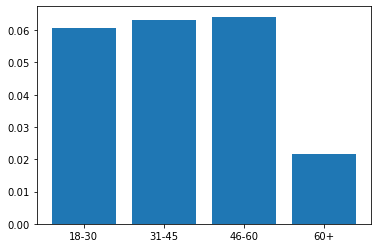

In [10]:
print('Click percentage')
plt.bar(df_summ['age_range'], df_summ['num_click']/df_summ['num_receive'])

Add to cart percentage


<BarContainer object of 4 artists>

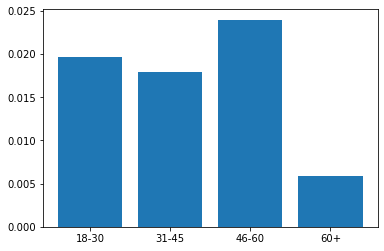

In [11]:
print('Add to cart percentage')
plt.bar(df_summ['age_range'], df_summ['num_added_to_cart']/df_summ['num_receive'])

Purchase percentage


<BarContainer object of 4 artists>

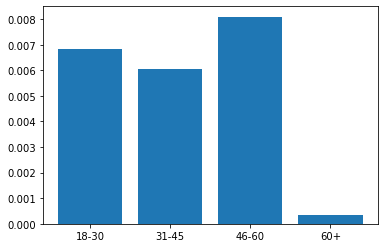

In [12]:
print('Purchase percentage')
plt.bar(df_summ['age_range'], df_summ['num_purchased']/df_summ['num_receive'])

From add to cart to purchase percentage


<BarContainer object of 4 artists>

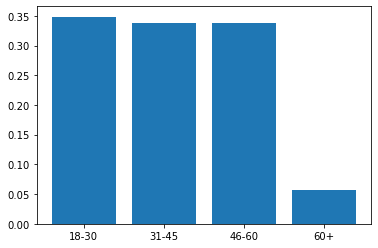

In [13]:
print('From add to cart to purchase percentage')
plt.bar(df_summ['age_range'], df_summ['num_purchased']/df_summ['num_added_to_cart'])

Coupon percentage


<BarContainer object of 4 artists>

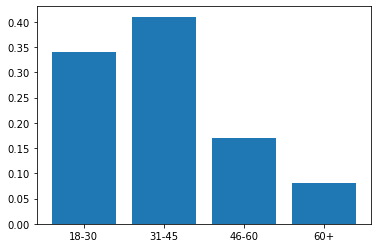

In [14]:
print('Coupon percentage')
plt.bar(df_summ['age_range'], df_summ['coupon_value']/df_summ['coupon_value'].sum())

Order value percentage


<BarContainer object of 4 artists>

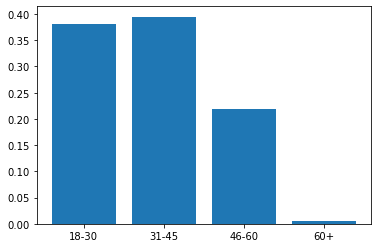

In [15]:
print('Order value percentage')
plt.bar(df_summ['age_range'], df_summ['order_value']/df_summ['order_value'].sum())

Org value percentage


<BarContainer object of 4 artists>

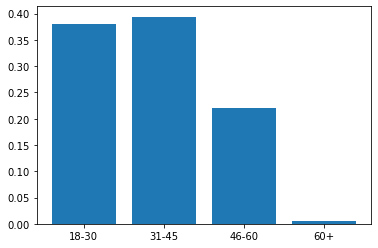

In [16]:
print('Org value percentage')
plt.bar(df_summ['age_range'], df_summ['org_value']/df_summ['org_value'].sum())

Coupon value percentage


<BarContainer object of 4 artists>

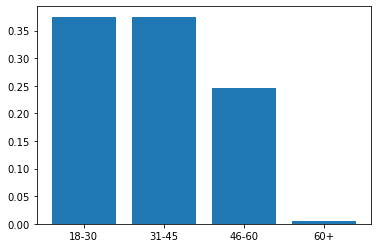

In [17]:
print('Coupon value percentage')
plt.bar(df_summ['age_range'], (df_summ['org_value']-df_summ['order_value'])/(df_summ['org_value']-df_summ['order_value']).sum())

Receive percentage


<BarContainer object of 4 artists>

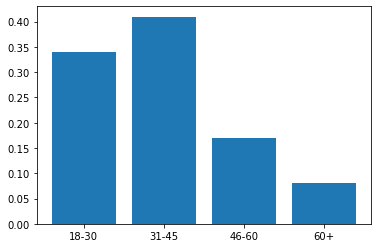

In [18]:
print('Receive percentage')
plt.bar(df_summ['age_range'], df_summ['num_receive']/df_summ['num_receive'].sum())

Order value/receive percentage


<BarContainer object of 4 artists>

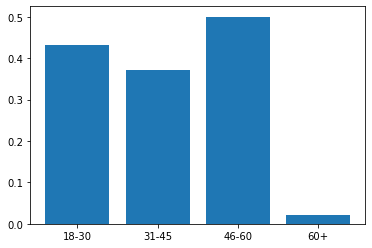

In [23]:
print('Order value/receive percentage')
plt.bar(df_summ['age_range'], df_summ['value/receive'])

1. Về tỉ lệ nhận tin nhắn:
<ul>
    <li>nhóm 31-45 chiếm 40%</li> 
    <li>nhóm 18-30 chiếm 34%</li>
    <li>nhóm 46-60 chiếm 18%</li> 
    <li>nhóm 60 chiếm 8%</li>
</ul>


2. Về tỉ lệ click/nhận:
<ul>
    <li>3 nhóm 18-30/31-45/46-60 đều xấp xỉ 6%</li>
    <li>nhóm 60+ đạt 2.5%</li>
</ul>


3. Về tỉ lệ purchase/nhận:
<ul>
    <li>nhóm 46-60 đạt 0.8%</li>
    <li>nhóm 18-30 đạt 0.7%</li>
    <li>nhóm 31-45 đạt 0.6%</li>
    <li>nhóm 60+ đạt 0.04%</li>
</ul>


4. Về tỉ lệ theo giá trị order value đóng góp:
<ul>
    <li>2 nhóm 18-30 và 31-45 tương đương nhau (khoảng 38% mỗi nhóm)</li>
    <li>nhóm 46-60 gần bằng 2/3 (khoảng 23%)</li>
    <li>nhóm 60+ đóng góp tỉ lệ rất nhỏ, chỉ khoảng 1%</li>
</ul>


5. Về order_value/mỗi tin nhắn, nhóm 46-60 đạt rate cao nhất, tiếp theo là các nhóm 18-30, 31-45 và cuối cùng là nhóm 60+.

In [28]:
df_summ['value/receive']/0.5

0    0.864348
1    0.744638
2    1.000766
3    0.042490
Name: value/receive, dtype: float64

In [30]:
x = 60/(500+350*0.745+300*0.864+200*0.042)

## Theo age_range + channel

In [36]:
df_summary = df.groupby(['age_range','channel']).agg({'clicked':'sum','coupon':'sum','order_value':'sum','org_value':'sum','send_date':'count'})
df_summary.columns = ['num_click', 'coupon_value', 'order_value', 'org_value', 'num_receive']
df_summary.reset_index(inplace=True)
df_summary

,age_range,channel,num_click,coupon_value,order_value,org_value,num_receive
0,18-30,Email,2247,144426,15504,16388,46660
1,18-30,SMS,3958,171566,28624,29998,55447
2,31-45,Email,4271,173446,32474,34136,55880
3,31-45,SMS,3507,207552,13284,13884,67020
4,46-60,Email,995,71134,6204,6598,23001
5,46-60,SMS,2270,86574,19262,20350,27892
6,60+,Email,191,34132,142,152,10948
7,60+,SMS,327,40504,370,388,13152


In [37]:
for step in df.last_step.unique():
    if step == 'received':
        continue
    print(step)
    tmp_2 = df[df['last_step']==step]
    tmp_2 = tmp_2.groupby(['age_range','channel']).agg({'clicked':'count'})
    tmp_2.columns = ['num_'+step.replace(' ','_')]
    tmp_2.reset_index(inplace=True)
    df_summary = df_summary.merge(tmp_2, how='inner', on=['age_range','channel'])

bounced
added to cart
purchased
saw review
payment page


In [38]:
df_summary

,age_range,channel,num_click,coupon_value,order_value,org_value,num_receive,num_bounced,num_added_to_cart,num_purchased,num_saw_review,num_payment_page
0,18-30,Email,2247,144426,15504,16388,46660,851,296,273,793,34
1,18-30,SMS,3958,171566,28624,29998,55447,1395,507,426,1160,470
2,31-45,Email,4271,173446,32474,34136,55880,1508,385,558,1760,60
3,31-45,SMS,3507,207552,13284,13884,67020,1680,875,185,633,134
4,46-60,Email,995,71134,6204,6598,23001,388,194,115,229,69
5,46-60,SMS,2270,86574,19262,20350,27892,961,470,297,468,74
6,60+,Email,191,34132,142,152,10948,60,14,2,83,32
7,60+,SMS,327,40504,370,388,13152,107,12,6,126,76


In [39]:
df_summary['num_added_to_cart'] = df_summary['num_added_to_cart'] + df_summary['num_payment_page'] + df_summary['num_purchased']
df_summary['num_payment_page'] = df_summary['num_payment_page'] + df_summary['num_purchased']
df_summary['value/receive'] = df_summary['order_value']/df_summary['num_receive']

In [40]:
df_summary

,age_range,channel,num_click,coupon_value,order_value,org_value,num_receive,num_bounced,num_added_to_cart,num_purchased,num_saw_review,num_payment_page,value/receive
0,18-30,Email,2247,144426,15504,16388,46660,851,603,273,793,307,0.332276
1,18-30,SMS,3958,171566,28624,29998,55447,1395,1403,426,1160,896,0.516241
2,31-45,Email,4271,173446,32474,34136,55880,1508,1003,558,1760,618,0.581138
3,31-45,SMS,3507,207552,13284,13884,67020,1680,1194,185,633,319,0.198209
4,46-60,Email,995,71134,6204,6598,23001,388,378,115,229,184,0.269727
5,46-60,SMS,2270,86574,19262,20350,27892,961,841,297,468,371,0.690592
6,60+,Email,191,34132,142,152,10948,60,48,2,83,34,0.012970
7,60+,SMS,327,40504,370,388,13152,107,94,6,126,82,0.028133


Click percentage of 18-30


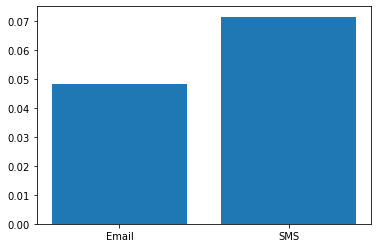

---------------------------------------------------
Click percentage of 31-45


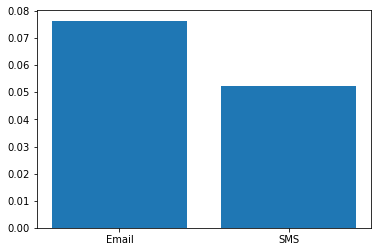

---------------------------------------------------
Click percentage of 46-60


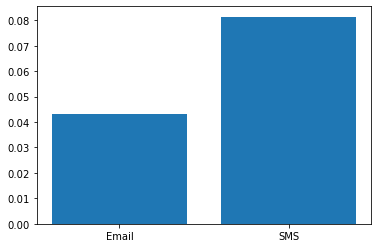

---------------------------------------------------
Click percentage of 60+


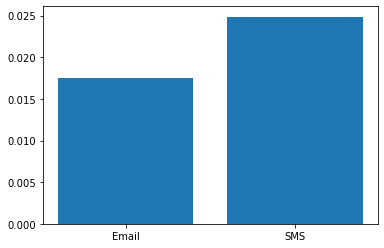

---------------------------------------------------


In [42]:
for age in df_summary.age_range.unique():
    tmp = df_summary[df_summary['age_range']==age]
    print(f'Click percentage of {age}')
    plt.bar(tmp['channel'], tmp['num_click']/tmp['num_receive'])
    plt.show()
    print('---------------------------------------------------')

Receive percentage of 18-30


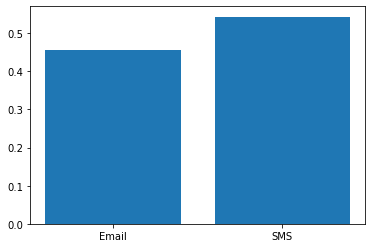

---------------------------------------------------
Receive percentage of 31-45


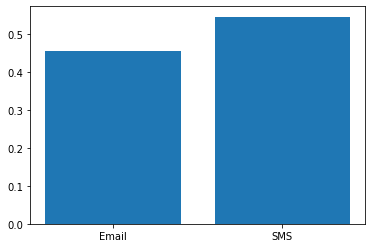

---------------------------------------------------
Receive percentage of 46-60


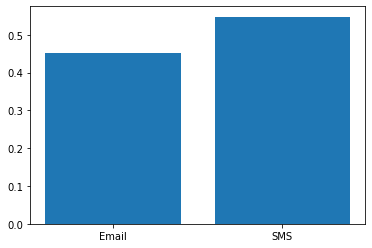

---------------------------------------------------
Receive percentage of 60+


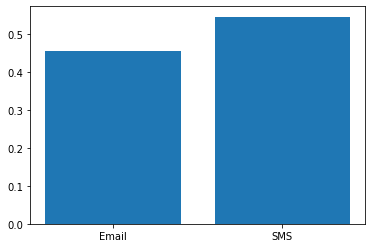

---------------------------------------------------


In [56]:
for age in df_summary.age_range.unique():
    tmp = df_summary[df_summary['age_range']==age]
    print(f'Receive percentage of {age}')
    plt.bar(tmp['channel'], tmp['num_receive']/tmp['num_receive'].sum())
    plt.show()
    print('---------------------------------------------------')

value/receive of 18-30


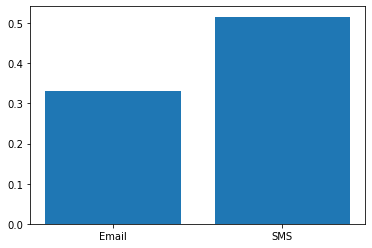

---------------------------------------------------
value/receive of 31-45


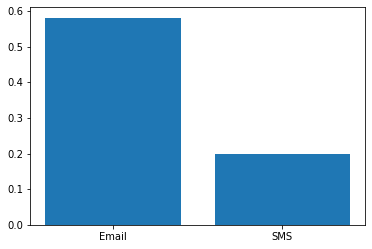

---------------------------------------------------
value/receive of 46-60


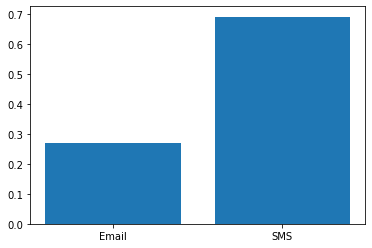

---------------------------------------------------
value/receive of 60+


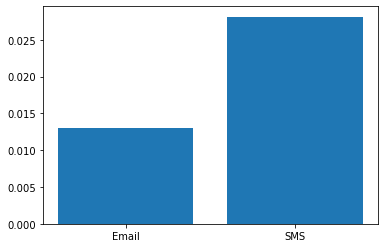

---------------------------------------------------


In [57]:
for age in df_summary.age_range.unique():
    tmp = df_summary[df_summary['age_range']==age]
    print(f'value/receive of {age}')
    plt.bar(tmp['channel'], tmp['value/receive'])
    plt.show()
    print('---------------------------------------------------')

1. Về tỉ lệ nhận tin nhắn: các nhóm đều có tỉ lệ Email/SMS là 46/54
    
    
2. Về tỉ lệ theo giá trị order_value/receive đóng góp:
<ul>
    <li>nhóm 18-30: Email bằng 2/3 SMS</li>
    <li>nhóm 31-45: Email gấp 3 lần SMS</li>
    <li>nhóm 46-60: Email bằng 0.4 lần SMS</li>
    <li>nhóm 60+: Email bằng 0.5 lần SMS</li>
</ul>



### Nhận xét

Dựa vào tỉ lệ giá trị order value đóng góp, cùng với giá của mỗi Email (0.075 USD) và SMS (0.05 USD), ta sẽ phân chia phần tiền đầu tư mỗi channel với mỗi nhóm là:
<ul>
    <li><b>nhóm 18-30</b>: gửi SMS cho các khách hàng, số tiền cho nhóm này là 15,000 USD</li>
    <li><b>nhóm 31-45</b>: gửi Email cho các khách hàng, số tiền cho nhóm này là 20,000 USD</li>
    <li><b>nhóm 46-60</b>: gửi SMS cho các khách hàng, số tiền cho nhóm này là 25,000 USD</li>
    <li><b>nhóm 60+</b>: có thể không cần gửi, do đóng góp value của nhóm này quá nhỏ so với các nhóm còn lại</li>
</ul>


## Như vậy, ta sử dụng 20,000 USD cho Email và 40,000 USD cho SMS